# <center> Assignment #9 (demo). Solution
## <center> Time series analysis

**Fill cells marked with "Your code here" and submit your answers to the questions through the [web form](https://docs.google.com/forms/d/1UYQ_WYSpsV3VSlZAzhSN_YXmyjV7YlTP8EYMg8M8SoM/edit).**

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests

from plotly import __version__
print(__version__) # need 1.9.0 or greater
init_notebook_mode(connected = True)


def plotly_df(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

4.4.1


## Data preparation

In [3]:
df = pd.read_csv('wiki_machine_learning.csv', sep = ' ')
df = df[df['count'] != 0]
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [4]:
df.shape

(383, 7)

## Predicting with FB Prophet
We will train at first 5 months and predict the number of trips for June.

In [5]:
df.date = pd.to_datetime(df.date)

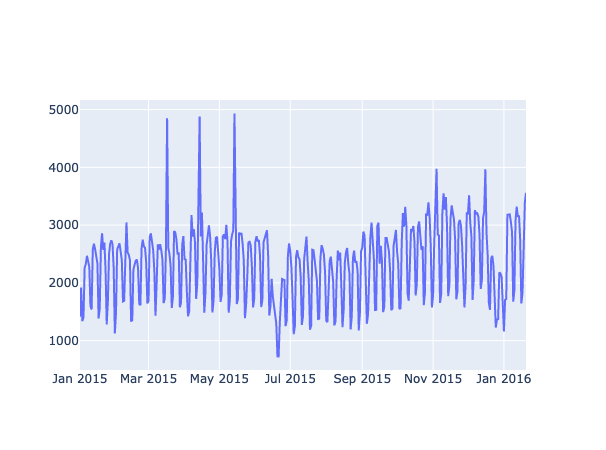

In [6]:
plotly_df(df.set_index('date')[['count']])

In [7]:
from fbprophet import Prophet

In [8]:
predictions = 30

df = df[['date', 'count']]
df.columns = ['ds', 'y']
df.tail()

,ds,y
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389
372,2016-01-20,3559


In [9]:
train_df = df[:-predictions].copy()

In [10]:
m = Prophet()
m.fit(train_df);

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future = m.make_future_dataframe(periods=predictions)
future.tail()

,ds
378,2016-01-16
379,2016-01-17
380,2016-01-18
381,2016-01-19
382,2016-01-20


In [12]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
378,2016-01-16,2981.154024,1726.732869,2551.190252,2961.847689,3000.751280,-861.706169,-861.706169,-861.706169,-861.706169,-861.706169,-861.706169,0.0,0.0,0.0,2119.447855
379,2016-01-17,2986.577498,1852.460569,2664.011538,2966.296208,3007.368426,-720.728280,-720.728280,-720.728280,-720.728280,-720.728280,-720.728280,0.0,0.0,0.0,2265.849218
380,2016-01-18,2992.000971,2846.043385,3678.356549,2970.458798,3014.379258,281.332823,281.332823,281.332823,281.332823,281.332823,281.332823,0.0,0.0,0.0,3273.333794
381,2016-01-19,2997.424444,3114.671186,3955.891071,2974.363294,3021.413618,541.456429,541.456429,541.456429,541.456429,541.456429,541.456429,0.0,0.0,0.0,3538.880873
382,2016-01-20,3002.847917,2995.421467,3856.950077,2977.714428,3028.177173,425.567222,425.567222,425.567222,425.567222,425.567222,425.567222,0.0,0.0,0.0,3428.415139


**<font color='red'>Question 1:</font>** What is the prediction of the number of views of the wiki page on January 20? Round to the nearest integer.

- 4947
- 3426 **[+]**
- 5229
- 2744

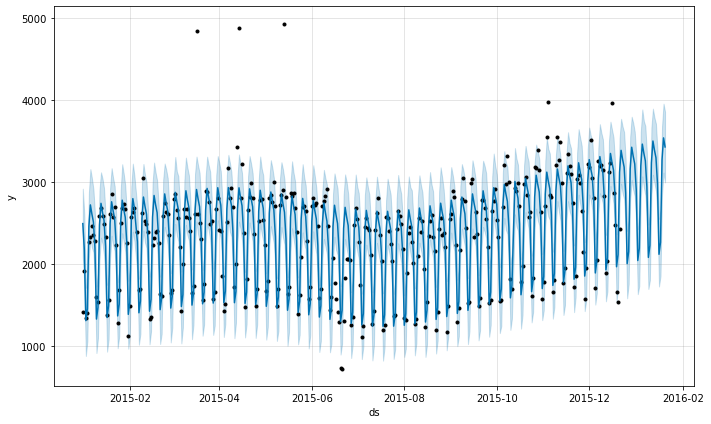

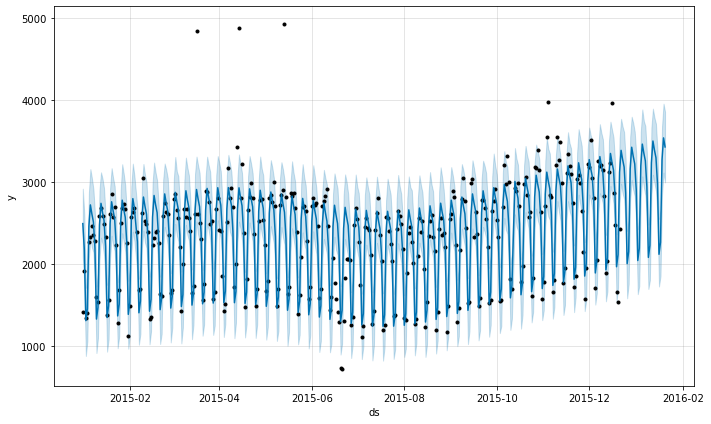

In [13]:
m.plot(forecast)

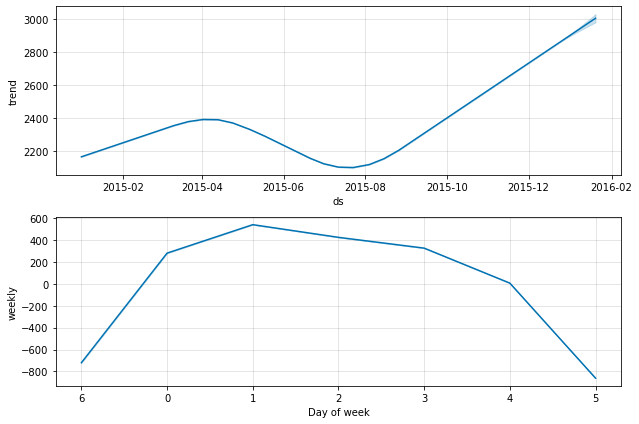

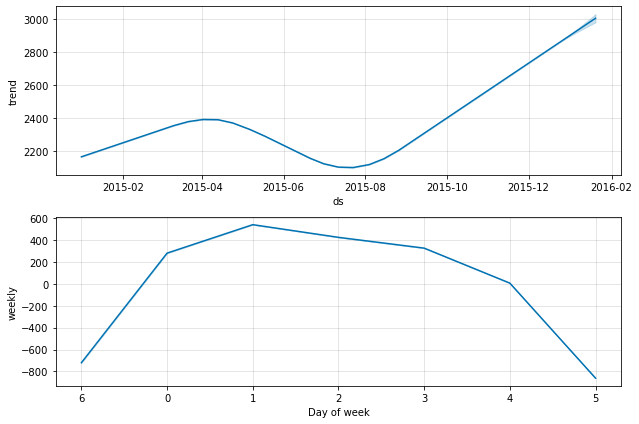

In [14]:
m.plot_components(forecast)

In [15]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))

In [35]:
cmp_df.head()

,yhat,yhat_lower,yhat_upper,y,e,p
ds,,,,,,
2015-01-01,2493.543598,2083.242971,2919.547629,1414,-1079.543598,-76.346789
2015-01-02,2176.311415,1756.757625,2605.504522,1920,-256.311415,-13.349553
2015-01-03,1310.286688,879.233587,1711.535828,1338,27.713312,2.071249
2015-01-04,1454.000802,1058.412329,1890.619740,1404,-50.000802,-3.561311
2015-01-05,2458.798130,2070.032174,2869.273899,2264,-194.798130,-8.604158


In [16]:
import numpy as np
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100 * cmp_df['e'] / cmp_df['y']
print('MAPE = ', round(np.mean(abs(cmp_df[-predictions:]['p'])), 2))
print('MAE = ', round(np.mean(abs(cmp_df[-predictions:]['e'])), 2))

MAPE =  34.58
MAE =  601.38


Estimate the quality of the prediction with the last 30 points.

**<font color='red'>Question 2:</font> What is MAPE equal to?**

- 34.5 **[+]**
- 42.42
- 5.39
- 65.91

**<font color='red'>Question 3:</font> What is MAE equal to?**

- 355
- 4007
- 600 **[+]**
- 903

## Predicting with ARIMA

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (15, 10)

**<font color='red'>Question 4:</font> Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?**

- Series is stationary, p_value = 0.107
- Series is not stationary, p_value = 0.107 **[+]**
- Series is stationary, p_value = 0.001
- Series is not stationary, p_value = 0.001

Dickey-Fuller test: p=0.107392


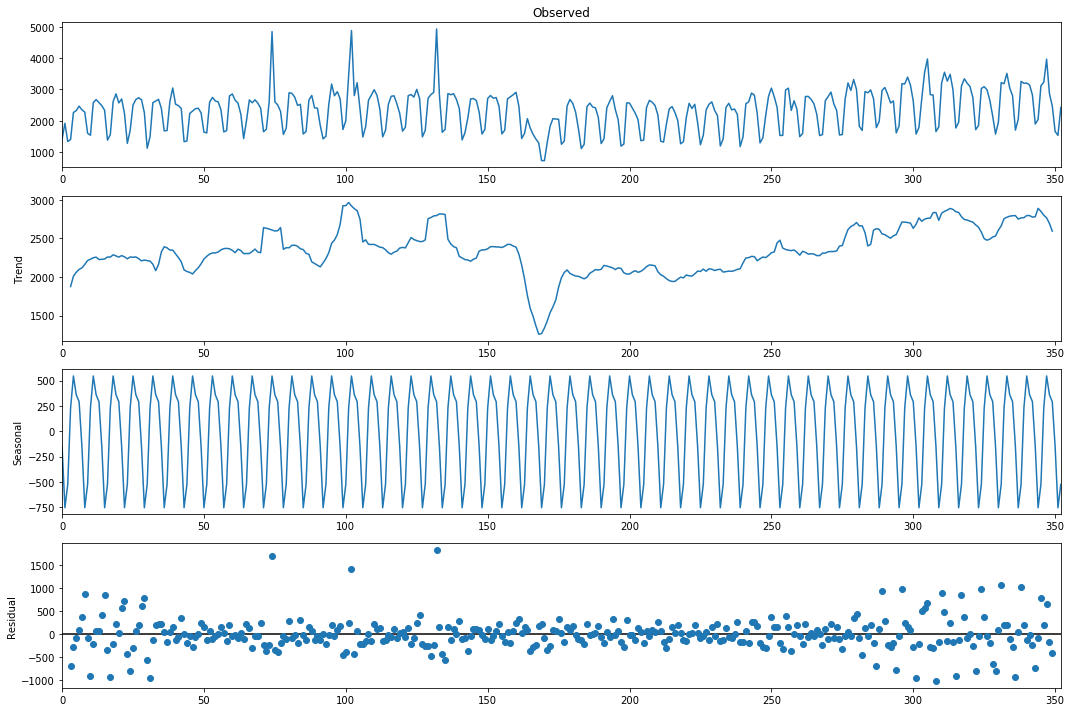

In [18]:
sm.tsa.seasonal_decompose(train_df['y'].values, freq=7).plot();
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(train_df['y'])[1])

But the seasonally differentiated series will already be stationary.

In [19]:
train_df.set_index('ds', inplace=True)

Dickey-Fuller test: p=0.000000


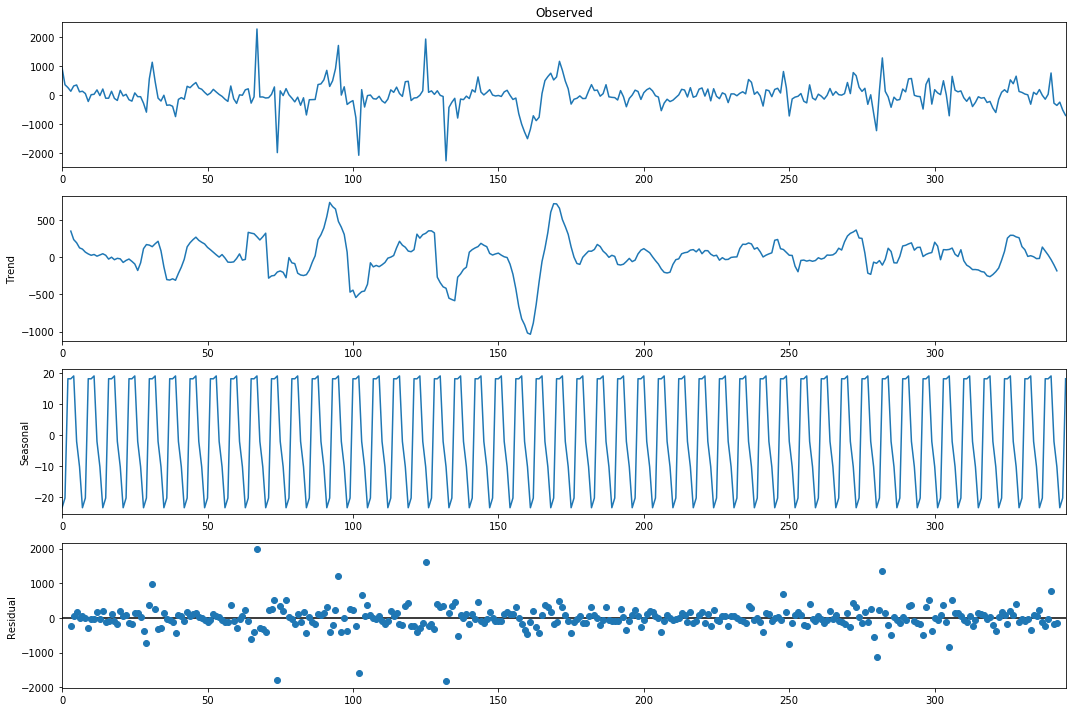

In [20]:
train_df['y_diff'] = train_df.y - train_df.y.shift(7)
sm.tsa.seasonal_decompose(train_df.y_diff[7:].values, freq=7).plot();
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(train_df.y_diff[8:])[1])

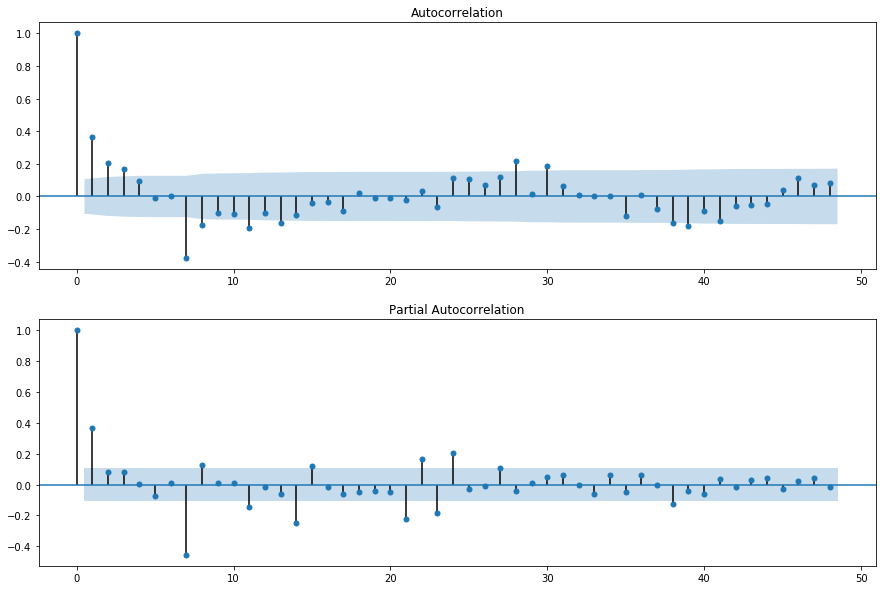

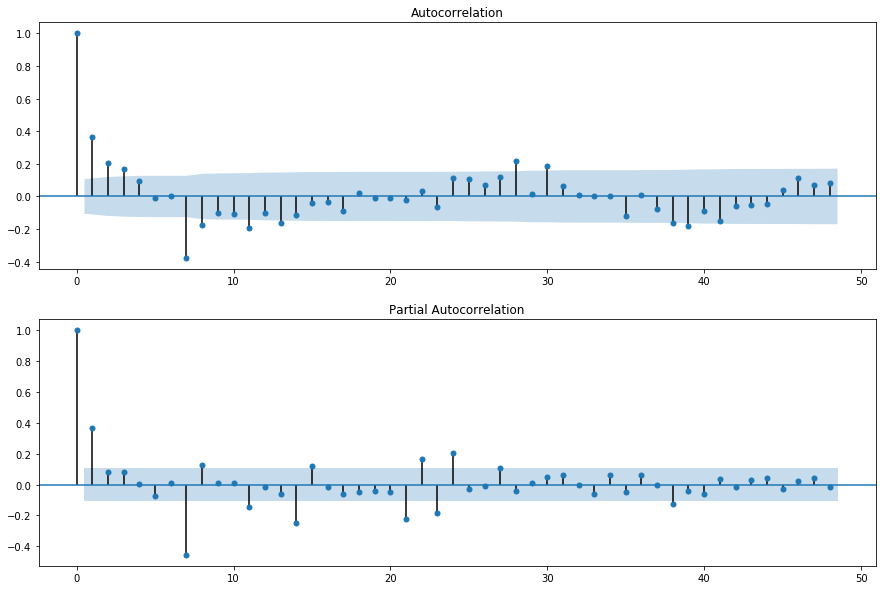

In [21]:
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(train_df.y_diff[13:].values.squeeze(), lags=48, ax=ax)

ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(train_df.y_diff[13:].values.squeeze(), lags=48, ax=ax)

Initial values:
* Q = 1
* q = 3
* P = 3
* p = 1

In [22]:
ps = range(0, 2)
ds = range(0, 2)
qs = range(0, 4)
Ps = range(0, 4)
Ds = range(0, 3)
Qs = range(0, 2)

In [23]:
from itertools import product

parameters = product(ps, ds, qs, Ps, Ds, Qs)
parameters_list = list(parameters)
len(parameters_list)

384

In [24]:
%%time
import warnings
from tqdm import tqdm
results1 = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in tqdm(parameters_list):
    #try except is necessary, because on some sets of parameters the model can not be trained
    try:
        model=sm.tsa.statespace.SARIMAX(train_df['y'], order=(param[0], param[1], param[2]), 
                                        seasonal_order=(param[3], param[4], param[5], 7)).fit(disp=-1)
    #print parameters on which the model is not trained and proceed to the next set
    except (ValueError, np.linalg.LinAlgError):
        continue
    aic = model.aic
    #save the best model, aic, parameters
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results1.append([param, model.aic])

100%|██████████| 384/384 [10:59<00:00,  1.72s/it]

CPU times: user 1h 5min 25s, sys: 18min 10s, total: 1h 23min 36s
Wall time: 10min 59s


In [25]:
result_table1 = pd.DataFrame(results1)
result_table1.columns = ['parameters', 'aic']
print(result_table1.sort_values(by = 'aic', ascending=True).head())

             parameters          aic
164  (0, 1, 2, 3, 2, 1)  4961.632628
332  (1, 1, 1, 3, 2, 1)  4962.832374
380  (1, 1, 3, 3, 2, 1)  4965.705653
188  (0, 1, 3, 3, 2, 1)  4969.534606
212  (1, 0, 0, 3, 2, 1)  4973.212241


If we consider the variants proposed in the form:

In [26]:
result_table1[result_table1['parameters'].isin([(1, 0, 2, 3, 1, 0),
                                                (1, 1, 2, 3, 2, 1),
                                                (1, 1, 2, 3, 1, 1),
                                                (1, 0, 2, 3, 0, 0)])]

,parameters,aic
255,"(1, 0, 2, 3, 0, 0)",5183.686573
257,"(1, 0, 2, 3, 1, 0)",5022.312524
354,"(1, 1, 2, 3, 1, 1)",5019.555903
356,"(1, 1, 2, 3, 2, 1)",4988.983084


Now do the same, but for the series with Box-Cox transformation.

In [27]:
import scipy.stats
train_df['y_box'], lmbda = scipy.stats.boxcox(train_df['y']) 
print("The optimal Box-Cox transformation parameter: %f" % lmbda)

The optimal Box-Cox transformation parameter: 0.732841


In [28]:
results2 = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    #try except is necessary, because on some sets of parameters the model can not be trained
    try:
        model=sm.tsa.statespace.SARIMAX(train_df['y_box'], order=(param[0], param[1], param[2]), 
                                        seasonal_order=(param[3], param[4], param[5], 7)).fit(disp=-1)
    #print parameters on which the model is not trained and proceed to the next set
    except (ValueError, np.linalg.LinAlgError):
        continue
    aic = model.aic
    #save the best model, aic, parameters
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results2.append([param, model.aic])
    
warnings.filterwarnings('default')

100%|██████████| 384/384 [09:27<00:00,  1.48s/it]


In [29]:
result_table2 = pd.DataFrame(results2)
result_table2.columns = ['parameters', 'aic']
print(result_table2.sort_values(by = 'aic', ascending=True).head())

             parameters          aic
259  (1, 0, 2, 3, 2, 1)  3528.650987
212  (1, 0, 0, 3, 2, 1)  3530.524249
378  (1, 1, 3, 3, 2, 1)  3531.814889
235  (1, 0, 1, 3, 2, 1)  3532.092279
331  (1, 1, 1, 3, 2, 1)  3534.434782


If we consider the variants proposed in the form:

In [30]:
result_table2[result_table2['parameters'].isin([(1, 0, 2, 3, 1, 0),
                                                (1, 1, 2, 3, 2, 1),
                                                (1, 1, 2, 3, 1, 1),
                                                (1, 0, 2, 3, 0, 0)])].sort_values(by='aic')

,parameters,aic
354,"(1, 1, 2, 3, 2, 1)",3534.540192
256,"(1, 0, 2, 3, 1, 0)",3556.880030
353,"(1, 1, 2, 3, 1, 1)",3557.845130
254,"(1, 0, 2, 3, 0, 0)",3674.916007


**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> <font color='red'>Question 5:</font> What parameters are the best for the model according to the `AIC` criterion?**

- D = 1, d = 0, Q = 0, q = 2, P = 3, p = 1
- D = 2, d = 1, Q = 1, q = 2, P = 3, p = 1 **[+]**
- D = 1, d = 1, Q = 1, q = 2, P = 3, p = 1
- D = 0, d = 0, Q = 0, q = 2, P = 3, p = 1

Let's look at the forecast of the best AIC model.

In [31]:
print(best_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               y_box   No. Observations:                  353
Model:             SARIMAX(1, 0, 2)x(3, 2, [1], 7)   Log Likelihood               -1756.325
Date:                             Tue, 23 Jun 2020   AIC                           3528.651
Time:                                     14:47:16   BIC                           3559.259
Sample:                                          0   HQIC                          3540.848
                                             - 353                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8202      0.117      6.987      0.000       0.590       1.050
ma.L1         -0.3364      

Student's test: p=0.114788
Dickey-Fuller test: p=0.000000


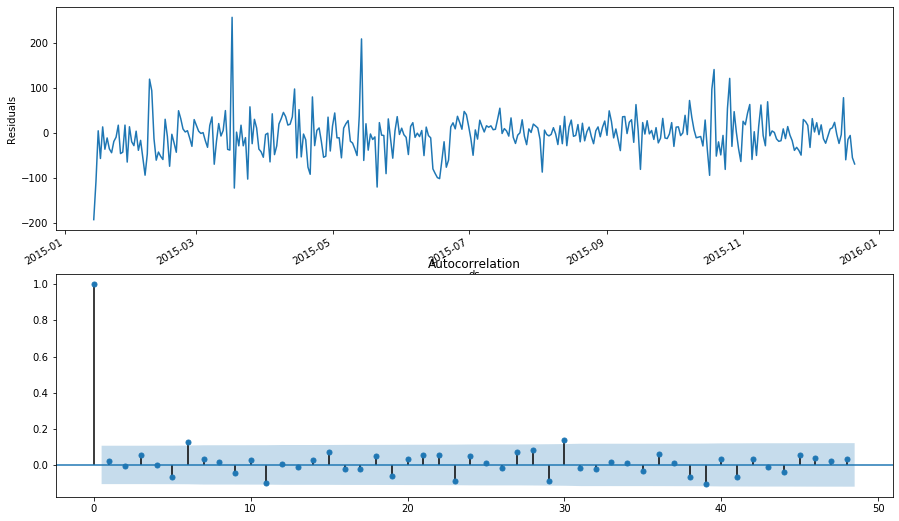

In [32]:
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Student's test: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

In [33]:
def invboxcox(y,lmbda):
    # reverse Box Cox transformation
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda * y + 1) / lmbda))

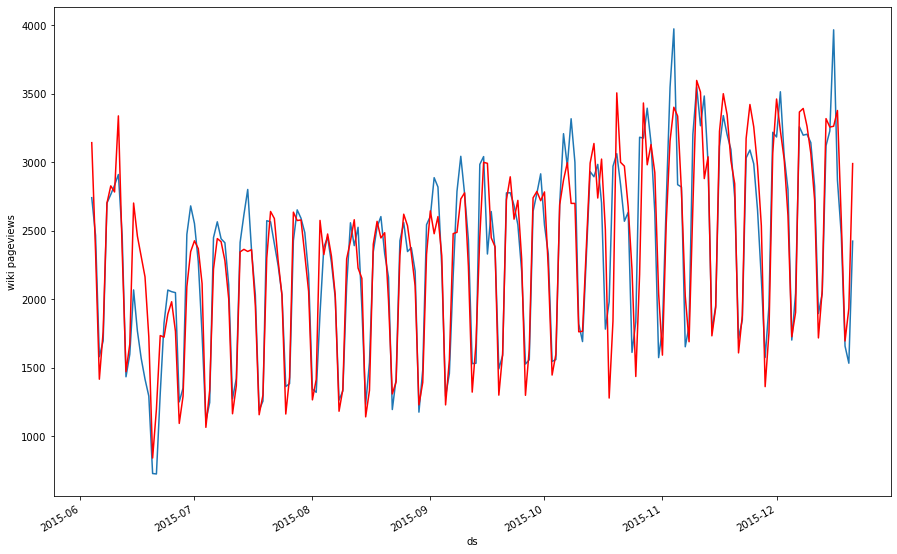

In [34]:
train_df['arima_model'] = invboxcox(best_model.fittedvalues, lmbda)

train_df.y.tail(200).plot()
train_df.arima_model[13:].tail(200).plot(color='r')
plt.ylabel('wiki pageviews');